In [1]:
import tensorflow as tf            # deep learning library. Tensors are just multi-dimensional arrays
import tensorflow.keras as keras

In [2]:
mnist = tf.keras.datasets.mnist   # mnist is a dataset of 28x28 images of handwritten digits and their labels 0-9
(X_train , y_train) ,( X_test, y_test) = mnist.load_data()  # unpacks images to X_train_full/X_test and labels to y_train_full/y_test

11493376/11490434 [==============================] - 0s 0us/step


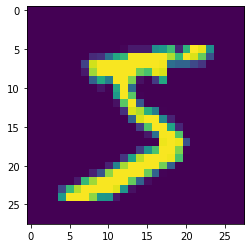

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])   # index 0th digit of  X_train_full data set in image form
plt.show()

In [4]:
print(X_train[0])  # index 0th digit of  X_train_full data set in binary form

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
y_train[0]   #  How about the value for y_train with the same index?

5

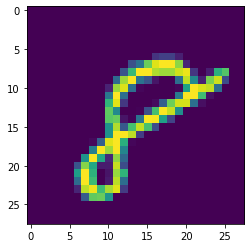

In [6]:
plt.imshow(X_train[59999]) # list of digit is from 0 to 59999

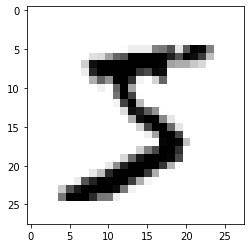

In [7]:
plt.imshow(X_train[0], cmap=plt.cm.binary) #  in black & white  no colour 

In [9]:
X_train = tf.keras.utils.normalize(X_train, axis=1)  # scales data between 0 and 1
X_test = tf.keras.utils.normalize(X_test, axis=1)  # scales data between 0 and 1

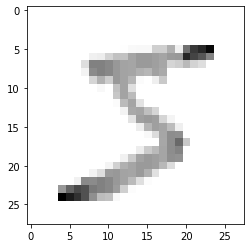

In [10]:
plt.imshow(X_train[0], cmap=plt.cm.binary) # Image looks lighter after scalling

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.layers[0].name

'flatten'

In [16]:
model.compile(loss="sparse_categorical_crossentropy", # how will we calculate our "error." Neural network aims to minimize loss.
optimizer="sgd",
metrics=["accuracy"]) # what to track

In [17]:
history = model.fit(X_train, y_train, epochs=30 )

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9919 - accuracy: 0.7628
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3757 - accuracy: 0.8948
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3072 - accuracy: 0.9126
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.9224
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2437 - accuracy: 0.9295
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2234 - accuracy: 0.9361
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2064 - accuracy: 0.9408
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1916 - accuracy: 0.9447
Epoch 9/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1784 - accuracy: 0.9492
Epoch 10/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.166

In [18]:
val_loss, val_acc = model.evaluate(X_test, y_test) # evaluate the out of sample data with model

313/313 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9710


In [19]:
#It's going to be very likely your accuracy out of sample is a bit worse, same with loss. 
#In fact, it should be a red flag if it's identical, or better.

In [20]:
history.history

{'accuracy': [0.7627666592597961,
  0.8947666883468628,
  0.9125666618347168,
  0.9223999977111816,
  0.9294666647911072,
  0.9361000061035156,
  0.940833330154419,
  0.944683313369751,
  0.949150025844574,
  0.9517999887466431,
  0.9560333490371704,
  0.958383321762085,
  0.9603666663169861,
  0.9629166722297668,
  0.9647666811943054,
  0.9666666388511658,
  0.9685999751091003,
  0.9698166847229004,
  0.9710666537284851,
  0.9730333089828491,
  0.9744333624839783,
  0.9753666520118713,
  0.9764000177383423,
  0.977733314037323,
  0.9785166382789612,
  0.979616641998291,
  0.9805999994277954,
  0.9815833568572998,
  0.9823833107948303,
  0.9832000136375427],
 'loss': [0.9919227361679077,
  0.37569043040275574,
  0.3072398900985718,
  0.27002647519111633,
  0.24366094172000885,
  0.2233579158782959,
  0.20641325414180756,
  0.19158123433589935,
  0.17838852107524872,
  0.16669321060180664,
  0.15604428946971893,
  0.14640390872955322,
  0.13765692710876465,
  0.1300203800201416,
  0.122

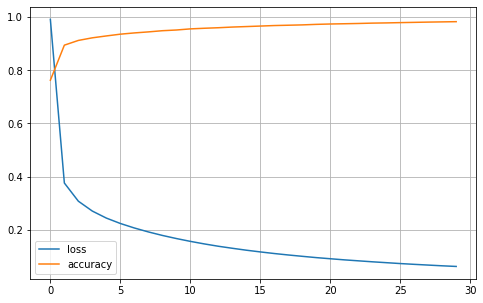

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
#plt.gca().set_xlim(0, 1)
plt.show()

In [22]:
model.save('epic_num_reader.model') # with your model, you can save it super easily:

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [23]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [24]:
predictions = new_model.predict(X_test)
print(predictions)

[[3.2848796e-08 1.1300473e-07 1.4641985e-05 ... 9.9969780e-01
  4.8354050e-06 3.9640863e-06]
 [2.5556355e-06 3.0526645e-03 9.9519831e-01 ... 9.5411767e-10
  3.6670244e-05 8.8377000e-11]
 [3.6808999e-07 9.9917835e-01 7.8840421e-05 ... 1.7474806e-04
  1.9381272e-04 1.6812544e-05]
 ...
 [1.0255446e-09 6.0430352e-07 8.5296520e-08 ... 4.7274360e-05
  1.8841412e-04 2.2230820e-04]
 [1.9347453e-05 4.7432400e-07 9.9842168e-08 ... 2.9134628e-07
  6.5200875e-04 2.7267854e-08]
 [1.0882144e-04 1.3040707e-07 5.8976020e-05 ... 1.8729860e-09
  6.0270929e-07 2.4174907e-08]]


In [25]:
#That sure doesn't start off as helpful, 
# but recall these are probability distributions. We can get the actual number pretty simply:
import numpy as np

print(np.argmax(predictions[0]))  # Predictions of X_test of 0th index is 7

7


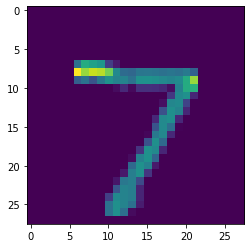

In [26]:
plt.imshow(X_test[0])
plt.show()